# Classification of the Latin alphabet

### Intro

For this project we were asked to classify a letter given a string of 100 zeros and ones using persistent homology. We were told that the algorithm should be able to compute a vector of features that we can use to compare to the other features of the Latin alphabet. The features that my group decided to use were probing from the upper left to lower right, upper right to lower left, bottom right to the upper left, scanning from left to right, scanning from right to left, and homology 1. Below are pictures of each of the scans:  

![alt text](https://drive.google.com/uc?id=16ItJF8t6IQ_0TVW4zZ7Tl324fbCQt0hH)
![alt text](https://drive.google.com/uc?id=1QIxpbakPRpG65r9n37-eKGqIiJj81mdc)
![alt text](https://drive.google.com/uc?id=1fnV8PKe2kDIGk2-qcI9JsReK4XYQme1d)
![alt text](https://drive.google.com/uc?id=1fnWEwOQSX5uls76EgrM6JgzyxaM5VJtO)
![alt text](https://drive.google.com/uc?id=1HzEaNr_AX8HOLy3AYagcq_8XdmHy8Nsi)

### Background

In this work, we are going to scan all 26 letters of the Latin alphabet in different ways by using persistent homology. Persistent homology is a method for computing change of topological features of a space. With Lower Star Image Filtrations, we were able to find the life and death pair for each single letter in 0-dimensional homology. Lower Star Image Filrations allows us to express our local minimums as birth times and our saddle points as death times. This is useful in our project since it gives us a way to summarize the critical points of our image. Next, we convert all the pairs to feature vector for each letter.



### Packages

In [0]:
pip install scikit-tda

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
  Created wheel for ripser: filename=ripser-0.4.1-cp36-cp36m-linux_x86_64.whl size=423321 sha256=463797dadab19583759fb388bc180f374a6dcf31c4418117f16c634ca3547a23
  Stored in directory: /root/.cache/pip/wheels/d4/12/da/56d55c3af62ebd5e0684d521f3e58c1a85ac312502c9e2d47d
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18091 sha256=8d7b9046fe4bd74e18e72b373af0d3894e39ea2f0dffca5299c22ba333135e62
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built ripser hopcroftkarp


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from numpy import genfromtxt
from ripser import ripser,lower_star_img
from persim import plot_diagrams

In [0]:
from google.colab import files
uploaded= files.upload()

Saving letters.csv to letters.csv


### First part of the algrorithm 

For all five scans, we use the lower_star_img package from ripser, to obtain the coordinates of each of the 0-order life-death pairs. At the additional last test, we run 1st order homology test for each letters and also obtain their coordinates.

In [0]:
letters = genfromtxt('letters.csv', delimiter =',')
#the main block: run 6 scans for each of the 26 letters, store results in a dictionary.
i=0
i_to_result = dict()
while i<=25:
    letter_one_line = letters[i,:]
#initialize matrix of size 10x10 with all values 100
    letter= np.full((10,10),100)
   #test 1 probing upper left
    for k in range(1,100):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max((k-1)%10, int((k-1)/10))
    PULscan = lower_star_img(letter)
    #test 2 left to right
    for j in range(1,100):
        if letter_one_line[j]==1.0:
            row=int((j-1)/10)
            column= (j-1)%10
            letter[row,column]= j%10
    LRscan = lower_star_img(letter)
    #test 3 right to left
    for k in range(1,100):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= 10 - (k-1)%10
    RLscan = lower_star_img(letter)
    #test 4 probing from bottom right
    for k in range(1,100):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max(9-(k-1)%10,9-int((k-1)/10))  
    PLBscan = lower_star_img(letter)
    #test 5 probing from upper right to lower left 
    for k in range(1,100):       
        if letter_one_line[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max(9-(k-1)%10,int((k-1)/10))  
    PURscan = lower_star_img(letter) 
    #test 6
    letter_ones_line = letters[i,1:]
    newletter = letter_ones_line.reshape(10,10)
    coordinates = np.argwhere(newletter == 1)
    dgms = ripser(coordinates)['dgms']
    h1_test = dgms[1]
    
    i_to_result[i] = (PULscan, LRscan, RLscan, PLBscan, PURscan, h1_test)
    i+=1

#change all infinity in life-death pair to 100.    
l=0
while l <=25:
    for j in range(6):
        len_j = len(i_to_result[l][j])
        for k in range(len_j):
            if str(i_to_result[l][j][k][1])=='inf':
                i_to_result[l][j][k][1]=100
    l+=1
#calculate feature vector for each letter, store them in a matrix. 
#every feature vector has 5 components, each component stands for the sum of "lifespan" of the life-death pairs in one scan.
l=0
vec_mtx = np.zeros((26,6))
while l < 26:
    for j in range(6):
        len_j = len(i_to_result[l][j])
        sum_j = 0
        for k in range(len_j):
            sum_j = sum_j+ (i_to_result[l][j][k][1]-i_to_result[l][j][k][0])
            vec_mtx[l][j] = sum_j
    l+=1
print('feature matrix:\n',vec_mtx,'\n')

#calculate the pairwise distance between each two letter, store them in a list.
all_dis = []
for q in range(26):
    for p in range(q):
            dis = np.linalg.norm(vec_mtx[q]-vec_mtx[p])
            all_dis.append((dis,p,q))

#sort all the distance from low to high, find the minimum distance, also find which letter pair has the minimum distance.             
def getkey(item):
    return item[0]

sorted_dis = sorted(all_dis, key=getkey)
print('how many items in this sorted distance list:',len(sorted_dis),'\n','sorted distance:',sorted_dis,'\n')

print('min distance is between',sorted_dis[0][1],'th letter and',sorted_dis[0][2],'th letter. min distance is',sorted_dis[0][0],'\n')

feature matrix:
 [[ 97.          98.          97.          98.          97.
    3.48528123]
 [ 98.          97.          98.          98.          97.
    6.23334539]
 [ 98.          98.         102.          98.          99.
    0.82842708]
 [ 98.          97.          98.          98.          98.
    5.24264061]
 [ 98.          97.         107.         100.         101.
    0.73304415]
 [ 98.          97.         100.          95.         100.
    0.3245554 ]
 [ 98.          98.         100.          97.          99.
    2.42366862]
 [ 98.          97.          96.          97.          97.
    0.12310553]
 [ 97.          97.          96.          96.          96.
    0.        ]
 [ 97.          98.          95.          96.          96.
    0.        ]
 [ 98.          97.          99.          97.          98.
    0.82842708]
 [ 98.          97.          96.          97.          93.
    0.        ]
 [ 99.          98.          97.         100.          98.
    2.12899017]
 [ 99.  

The algorithm above obtains a feature vector for all the letters of the Latin alphabet. By using a sorted list we notice that the smallest distance is between letter H and W. Thus, we have classified all of our letters since the minimum distance is above 0.

### Our experiments

Next, we will create a test feature block which will contain all the features we have already implented ie. Probing from upper left, scanning from left to right, scanning from right to left, etc. This will allow us to now test a new string of 100 zeros and ones against our feature matrix so that we can compare our test to our feature matrix and find out the best fitted letter.

In [0]:
#convert new test input list of 01010101... into feature vector.
def get_feature_vec(test): # 'test' stands for the 01010101... input.
    #run all the scans, get the life-death pairs.
    letter= np.full((10,10),100)
   #test 1 probing upper left
    for k in range(1,100):
        if test[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max((k-1)%10, int((k-1)/10))
    PULscan = lower_star_img(letter)
    #test 2 left to right
    for j in range(1,100):
        if test[j]==1.0:
            row=int((j-1)/10)
            column= (j-1)%10
            letter[row,column]= j%10
    LRscan = lower_star_img(letter)
    #test 3 right to left
    for k in range(1,100):
        if test[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= 10 - (k-1)%10
    RLscan = lower_star_img(letter)
    #test 4 probing from bottom right
    for k in range(1,100):
        if test[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max(9-(k-1)%10,9-int((k-1)/10))  
    PLBscan = lower_star_img(letter)
    #test 5 probing from upper right to lower left 
    for k in range(1,100):       
        if test[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max(9-(k-1)%10,int((k-1)/10))  
    PURscan = lower_star_img(letter) 
    #test 6
    newletter = test[1:].reshape(10,10)
    coordinates = np.argwhere(newletter == 1)
    dgms = ripser(coordinates)['dgms']
    h1_test = dgms[1]
    test_result = (PULscan, LRscan, RLscan, PLBscan, PURscan, h1_test)
    #change all infini to 100
    for j in range(6):
        len_j = len(test_result[j])
        for k in range(len_j):
            if str(test_result[j][k][1])=='inf':
                test_result[j][k][1]=100
    #get the feature vector
    test_feature = np.zeros(6)
    for j in range(6):
        len_j = len(test_result[j])
        sum_j = 0
        for k in range(len_j):
            sum_j = sum_j+ (test_result[j][k][1]-test_result[j][k][0])
            test_feature[j] = sum_j
            
    return test_feature

To determine that we do get the correct feature vector we first take a known string of zeros and ones. We will compare this to our feature matrix. 

[8 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
feature vect of input list is: [97. 97. 96. 96. 96.  0.]
standard feature vect of I is: [97. 97. 96. 96. 96.  0.]
the best fitted letter is: 8 th letter 
 the closest distance is: 0.0 



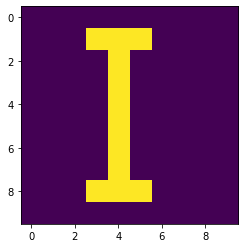

In [0]:
#Here is where we make up a test list. We will be using the letter I (the 8th letter) in 10X10 grid.
New_I = [8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
New_I = np.asarray(New_I)
plt.imshow(New_I[1:].reshape(10,10))
print(New_I)
feature_vect = get_feature_vec(New_I)


print('feature vect of input list is:',feature_vect)
print('standard feature vect of I is:', vec_mtx[8])

#compare the newly obtained test feature vector, to each of the feature vector stored in matrix.
test_dis = []
for i in range(len(vec_mtx)):
    # compare feature_vect with each of the vect in vec_mtx, see which distance=norm(feature_vect - vect) is smalletst.
    d = np.linalg.norm(feature_vect - vec_mtx[i])
    test_dis.append((d,i))
    
#then find the which vector has the smallest distance with input test vector, choose it as our best fitted letter.
sorted_result = sorted(test_dis,key=getkey)
print('the best fitted letter is:',sorted_result[0][1],'th letter','\n','the closest distance is:',sorted_result[0][0],'\n')

Notice that our algorithm does work when determining an exact string from our orignal matrix. Now we will take out four points from the string and see if our algorithm is able to determine that it is the letter I. 

[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
feature vect of input list is: [96. 95. 96. 96. 96.  0.]
standard feature vect of I is: [97. 97. 96. 96. 96.  0.]
the best fitted letter is: 8 th letter 
 the closest distance is: 2.23606797749979 



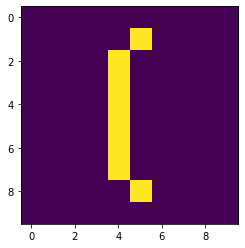

In [0]:
#Here is where we manual take out 4 points from the letter I
New_I = [8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
New_I = np.asarray(New_I)
plt.imshow(New_I[1:].reshape(10,10))
print(New_I)
feature_vect = get_feature_vec(New_I)


print('feature vect of input list is:',feature_vect)
print('standard feature vect of I is:', vec_mtx[8])

#compare the newly obtained test feature vector, to each of the feature vector stored in matrix.
test_dis = []
for i in range(len(vec_mtx)):
    # compare feature_vect with each of the vect in vec_mtx, see which distance=norm(feature_vect - vect) is smalletst.
    d = np.linalg.norm(feature_vect - vec_mtx[i])
    test_dis.append((d,i))
    
#then find the which vector has the smallest distance with input test vector, choose it as our best fitted letter.
sorted_result = sorted(test_dis,key=getkey)
print('the best fitted letter is:',sorted_result[0][1],'th letter','\n','the closest distance is:',sorted_result[0][0],'\n')

As we can see from the picture above, we have removed some of the points in I. However, this did not affect our algorithm as we are still getting that the best fitted letter is the 8th letter (I). Now we will randomly remove points to make sure that our algrothim is as robust as we believe it is.

Feature vector of Noise I:
 [286. 287. 284. 283. 284.   0.] 
 Original feature vector of I:
 [97. 97. 96. 96. 96.  0.]
the best fitted letter is: 4 th letter 
 the closest distance is: 412.0091471723925 



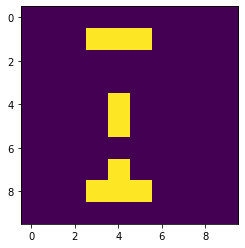

In [0]:
def takeoff_pts(letter_one_line, num_of_pts): #input the 010101001.. sequece of a letter, and the number of points you want to take of from this letter, say 2, or 5 etc.
    one_list = []
    l = len(letter_one_line)
    for i in range(l):
        if letter_one_line[i]==1:
            one_list.append(i)

    zero_posi = np.random.choice(one_list, size= num_of_pts)

    minus_one = np.zeros(101)
    
    for i in zero_posi:
        minus_one[i] = -1
    
    Noise_letter0 = letter_one_line + minus_one

    return Noise_letter0

letter_I = letters[8,:]


Noise_I = takeoff_pts(letter_I, 3)

Noise_feature0 = get_feature_vec(Noise_I)
print('Feature vector of Noise I:\n',Noise_feature0,'\n','Original feature vector of I:\n',vec_mtx[8])

Noise_I = np.asarray(Noise_I)
plt.imshow(Noise_I[1:].reshape(10,10))
#compare the newly obtained test feature vector, to each of the feature vector stored in matrix.
test_dis = []
for i in range(len(vec_mtx)):
    # compare feature_vect with each of the vect in vec_mtx, see which distance=norm(feature_vect - vect) is smalletst.
    d = np.linalg.norm(Noise_feature0 - vec_mtx[i])
    test_dis.append((d,i))
    
#then find the which vector has the smallest distance with input test vector, choose it as our best fitted letter.
sorted_result = sorted(test_dis,key=getkey)
print('the best fitted letter is:',sorted_result[0][1],'th letter','\n','the closest distance is:',sorted_result[0][0],'\n')

Now we are not getting an accurate best fitted letter. To see exactly how the result is affected by the position of noise point, we will again manually remove a few points and examine its effect. Lets take off the upper bar of I.

[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
feature vect of input list is: [96. 96. 95. 96. 95.  0.]
standard feature vect of I is: [97. 97. 96. 96. 96.  0.]
the best fitted letter is: 8 th letter 
 the closest distance is: 2.0 



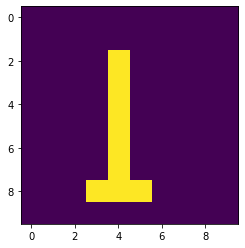

In [0]:
New_I = [8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
New_I = np.asarray(New_I)
plt.imshow(New_I[1:].reshape(10,10))
print(New_I)
feature_vect = get_feature_vec(New_I)


print('feature vect of input list is:',feature_vect)
print('standard feature vect of I is:', vec_mtx[8])

#compare the newly obtained test feature vector, to each of the feature vector stored in matrix.
test_dis = []
for i in range(len(vec_mtx)):
    # compare feature_vect with each of the vect in vec_mtx, see which distance=norm(feature_vect - vect) is smalletst.
    d = np.linalg.norm(feature_vect - vec_mtx[i])
    test_dis.append((d,i))
    
#then find the which vector has the smallest distance with input test vector, choose it as our best fitted letter.
sorted_result = sorted(test_dis,key=getkey)
print('the best fitted letter is:',sorted_result[0][1],'th letter','\n','the closest distance is:',sorted_result[0][0],'\n')

Again, the best fitted letter is I so let's remove a center point and see what happens. 

[8 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
feature vect of input list is: [191. 192. 190. 190. 190.   0.]
standard feature vect of I is: [97. 97. 96. 96. 96.  0.]
the best fitted letter is: 4 th letter 
 the closest distance is: 201.45604322958934 



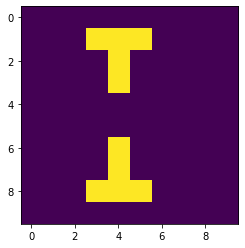

In [0]:
#Here is where we make up a test list. We will be using the letter I (the 8th letter) in 10X10 grid.
New_I = [8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
New_I = np.asarray(New_I)
plt.imshow(New_I[1:].reshape(10,10))
print(New_I)
feature_vect = get_feature_vec(New_I)


print('feature vect of input list is:',feature_vect)
print('standard feature vect of I is:', vec_mtx[8])

#compare the newly obtained test feature vector, to each of the feature vector stored in matrix.
test_dis = []
for i in range(len(vec_mtx)):
    # compare feature_vect with each of the vect in vec_mtx, see which distance=norm(feature_vect - vect) is smalletst.
    d = np.linalg.norm(feature_vect - vec_mtx[i])
    test_dis.append((d,i))
    
#then find the which vector has the smallest distance with input test vector, choose it as our best fitted letter.
sorted_result = sorted(test_dis,key=getkey)
print('the best fitted letter is:',sorted_result[0][1],'th letter','\n','the closest distance is:',sorted_result[0][0],'\n')

From above result, we see if we took a point at center of I off, it changes drastically. The feature vector of new I has a norm greater than most of the vectors in feature matrix, so the new result is letter E, since it has the greatest norm in our feature map, therefore closer to our new letter I.

[2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1]
feature vect of input list is: [ 96.        107.         99.         99.         97.          2.3005631]
standard feature vect of I is: [97.         98.         97.         98.         97.          3.48528123]
the best fitted letter is: 18 th letter 
 the closest distance is: 7.140882049405402 



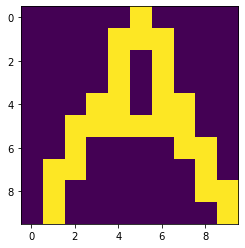

In [0]:
new_A = [2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1]
new_A = np.asarray(new_A)
#new_A = letters[0]
plt.imshow(new_A[1:].reshape(10,10))
print(new_A)
feature_vect = get_feature_vec(new_A)


print('feature vect of input list is:',feature_vect)
print('standard feature vect of I is:', vec_mtx[0])

#compare the newly obtained test feature vector, to each of the feature vector stored in matrix.
test_dis = []
for i in range(len(vec_mtx)):
    # compare feature_vect with each of the vect in vec_mtx, see which distance=norm(feature_vect - vect) is smalletst.
    d = np.linalg.norm(feature_vect - vec_mtx[i])
    test_dis.append((d,i))
    
#then find the which vector has the smallest distance with input test vector, choose it as our best fitted letter.
sorted_result = sorted(test_dis,key=getkey)
print('the best fitted letter is:',sorted_result[0][1],'th letter','\n','the closest distance is:',sorted_result[0][0],'\n')

### Advantages of the classification system

The main advantage of our classification system is that we have successfully differentiated between letters. We know that this is true since the minimum difference between each letter pair is greater than zero. So, each letter has a unique feature vector. Another advantage of our classification system is that we are able to determine exact letters with no points missing.

### Criticism of the classification system

We observe that the results are not robust since eliminating random points from the letter 'I' fails to give the expected best fitted letter

To take a closer look of what happend, we discarded some points manually from the letter to observe how  the postion of noise block affects the result. 
The letter 'I' is not affected by eliminating some points in the upper bar portion of the letter.
Whereas, by having some points eliminated at the center of the letter I, the best fitted letter observed is E, as it has the largest norm in our feature map.




### Conclusion

In conclusion, we format the letters on the image into vectors and then scan them for multi-dimensional and multi-directional algorithms, even for noise removal. Image vectorization is a good way to deal with image recognition in topological data analysis, machine learning, deep learning and even in reinforcement learning. I believe that if we have more test data sets, our results will become more and more accurate. If the final algorithm of our algorithm is not ideal for the recognition rate of new handwritten letters, the reasons may be as follows: First, the image feature extraction is too simple, the edges of the image are blank, and the center positions of the letters in the image may not all correspond; Then, the sample size is small, and each character has only one training sample. The real training requires massive data. Of course, we can also try to improve the classification recognition rate with other learning algorithms, such as KNN algorithm, SVM algorithm, logistic regression, neural network, etc. 